<a 
 href="https://colab.research.google.com/github/LearnPythonWithRune/FinancialDataAnalysisWithPython/blob/main/colab/starter/01 - Introduction to Pandas.ipynb"
 target="_parent">
<img 
 src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# 1. Introduction to DataFrames
- Read data from CSV (downloadable from Yahoo! Finance)
- Understand data types
- Set index
- Parse dates 
- Use index with **loc**
- Use indexing with **iloc**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("AAPL.csv", index_col=0, parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400


In [4]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
data.index

DatetimeIndex(['2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07',
               ...
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [6]:
data.loc['2020-01-27']

Open         7.751500e+01
High         7.794250e+01
Low          7.622000e+01
Close        7.723750e+01
Adj Close    7.657619e+01
Volume       1.619400e+08
Name: 2020-01-27 00:00:00, dtype: float64

In [7]:
data.loc['2021-01-01':]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,129.410004,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,131.009995,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.599998,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.919998,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,132.050003,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900
2021-01-12,128.500000,129.690002,126.860001,128.800003,128.800003,91951100
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800
2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800


In [8]:
data.loc[:'2020-07-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400
...,...,...,...,...,...,...
2020-06-25,90.175003,91.250000,89.392502,91.209999,90.889038,34380600
2020-06-26,91.102501,91.330002,88.254997,88.407501,88.096405,51314200
2020-06-29,88.312500,90.542503,87.820000,90.445000,90.126732,32661500


In [9]:
data.iloc[0]

Open         7.751500e+01
High         7.794250e+01
Low          7.622000e+01
Close        7.723750e+01
Adj Close    7.657619e+01
Volume       1.619400e+08
Name: 2020-01-27 00:00:00, dtype: float64

In [10]:
data.iloc[-1]

Open         1.436000e+02
High         1.443000e+02
Low          1.413700e+02
Close        1.420800e+02
Adj Close    1.420800e+02
Volume       5.038856e+07
Name: 2021-01-26 00:00:00, dtype: float64

In [11]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,132.029999,104319500
2021-01-21,133.800003,139.669998,133.589996,136.869995,136.869995,120529500
2021-01-22,136.279999,139.850006,135.020004,139.070007,139.070007,114459400
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157282400
2021-01-26,143.600006,144.300003,141.369995,142.080002,142.080002,50388565


# Visualize data using Matplotlib

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


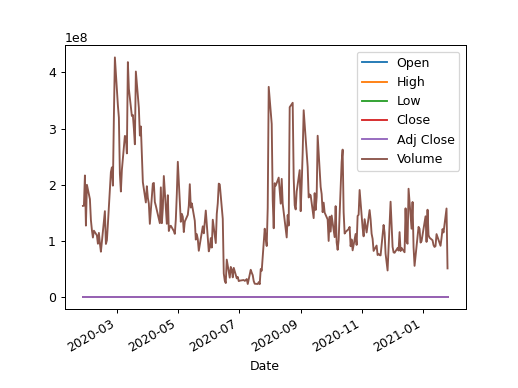

<AxesSubplot:xlabel='Date'>

In [13]:
data.plot()

<IPython.core.display.Javascript object>


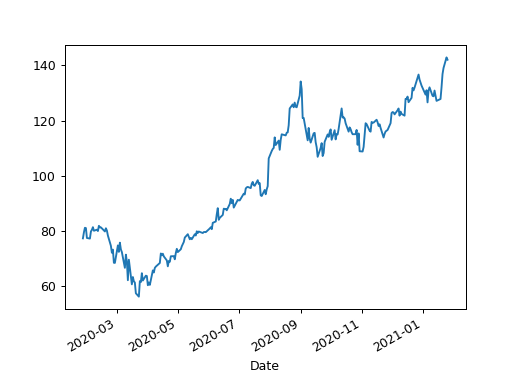

<AxesSubplot:xlabel='Date'>

In [14]:
data['Close'].plot()

# End